# Predicting Housing Prices - Advanced Regression

## Goal: Build a machine learning predictive model to predict monetary value of homes in Boston

### Context

In this project we will build and evaluate the performance and predictive power of a 'best fit' model trained on data collected from homes located in the suburbans of Boston.
The dataset is sourced from UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts.
Note that every record will describe a Boston suburb or a town

### About the dataset

**Dataset** : Boston housing data

* **CRIM** -  per capita crime rate by town
* **ZN**   - proportion of residential land zoned for lots over 25,000 sq.ft.
* **INDUS** - proportion of non-retail business acres per town
* **CHAS** -  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **NOX** -  nitric oxides concentration (parts per 10 million)
* **RM** - average number of rooms per dwelling
* **AGE** -  proportion of owner-occupied units built prior to 1940
* **DIS** -  weighted distances to five Boston employment centres
* **RAD** -  index of accessibility to radial highways
* **TAX** -  full-value property-tax rate per 10,000usd
* **PTRATIO** -  pupil-teacher ratio by town
* **B** -  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* **LSTAT** -  % lower status of the population

## Machine learning/Data Science Pipeline

* Importing all required libraries
* Loading/Importing the dataset
* Data Exploration
* Splitting the data into training and test datasets
* Model Development
* Model Comparison/Interpreting the results

## - Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split
%matplotlib inline

C:\Users\aashi\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\aashi\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## - Loading/Importing the dataset

* We will import the dataset from the sci-kit learn library

In [2]:
#importing dataset
from sklearn.datasets import load_boston
df = load_boston()

#creating the dataframe
data = pd.DataFrame(df.data)

## - Data exploration
* Here we take an in-depth look at the data to draw inferences, check for missing or null values, run descriptive statistics etc to specifically look at characteristics of all the variables

In [3]:
#shape of data and reading the first 3 rows
data.shape

(506, 13)

* the data has 13 variables with 506 observations


In [4]:
#reading first 3 rows
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


* Let's add the column headers to all the listed attributes as shown in the code below

In [5]:
#column headers
data.columns = df.feature_names
data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [6]:
#adding target variable to the data frame
data['PRICE'] = df.target 

In [7]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

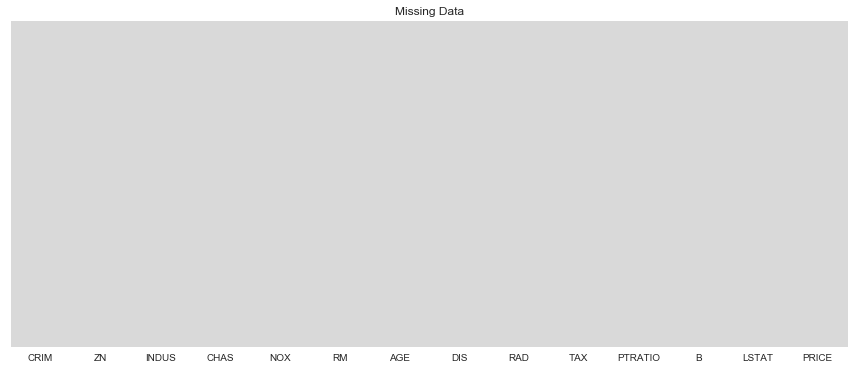

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [8]:
#missing values
sns.set_style('darkgrid')
plt.figure(figsize = (15,6))
sns.heatmap(data.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data')
plt.show()


data.isnull().sum()

* It looks like there are no null values in any of the features. Now we will look at running some descriptive statistics

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


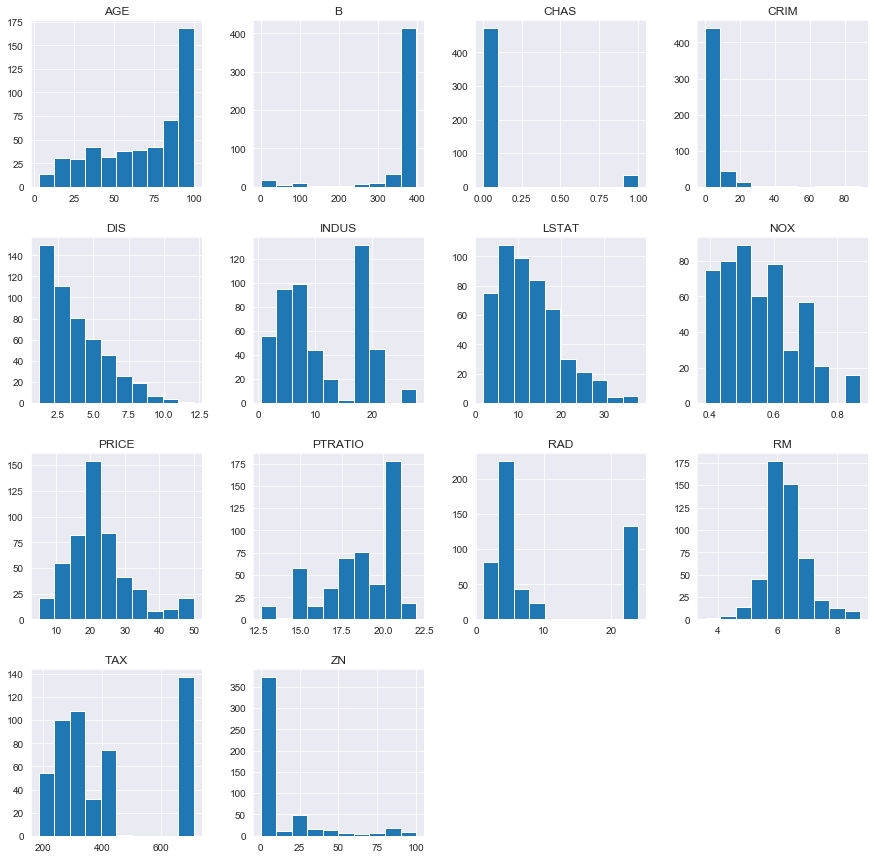

In [39]:
#running descriptive statistics
p=data.hist(figsize = (15,15))
data.describe().transpose()

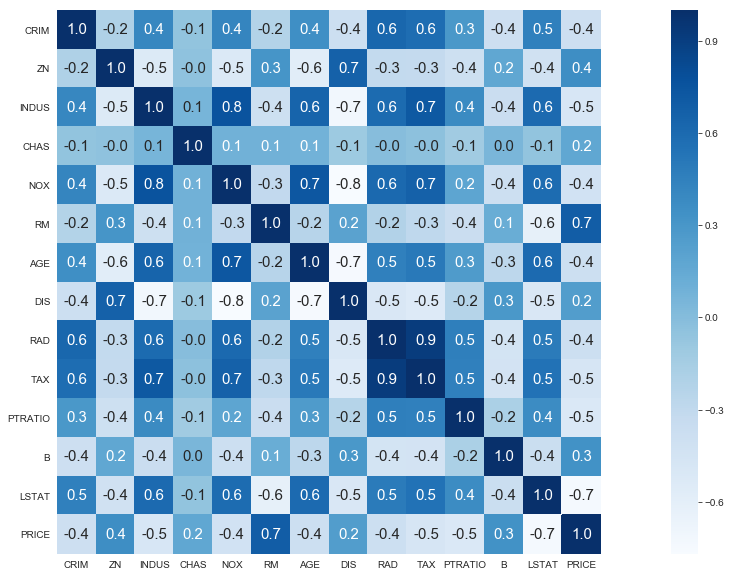

In [40]:
#correlation matrix to check for dependencies

corr = data.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

* Correlation is a statistical measure that explains how one or more numerical variables are related to each other. It is used to check for linear dependencies between the independent variables/features of the data. 
* Two features are said to be positively correlated with each other if increase in the value of one variable results in the proportional increase in the value of the other. 
* Correlation coefficient can have a value in the range of -1.0 to 1.0. A value of 0 indicates that there is no correlation between the variables

## - Splitting the data into training and test datasets

In [11]:
X = data.drop('PRICE', axis = 1)
y = data['PRICE']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=1)

## - Model Development

We will now move on to the model development phase where we build several machine learning models to predict the house prices and also compare the results of the different models. 
For the purpose of this project we will be building and evaluating the following models

1. Linear Regression
2. Random Forest Regressor
3. XGBoost Regressor
4. SVM Regressor

Now, for evaluating the model we will be using the following metrics

* **R^2** : R-squared is a statiscal measure that determines how close the data is to the regression line that is being fit. Basically it indicates the goodness of fit of a model. It can take values between 0 and 1 and in general, the higher the value of R^2, the better the model fits the data

* **Adjusted R^2** : As more independent variables are added to the model, the higher the value of R^2 will climb. It will never decrease with the addition of more variables. Though it might seem like the model with the higher R^2 is a better fit, but in reality the increase in R^2 metric it is only due of the addition of more variables. The adjusted R^2 compensates for the addition of independent varaibles and unlike R^2, it will only increase if the new variable enhances the performance of the model. Essentially adjusted R^2 takes into account the overfitting caused when calculating R^2 and gives a more realistic evaluation of the model

* **MAE** : It is the mean of the absolute value of the difference between the actual and predicted values (error)

* **MSE** : This metric gives the average value of the sqaure of the absolute differences between the actual and the predicted value

* **RMSE** : It is the square root of the average value of the squared differences between the prediction and the actual observation. RMSE is most preferred when the large errors particularly need to stand out


#### 1. Linear Regression

In [13]:
#MODEL TRAINING

#creating a linear regressor
lm = LinearRegression()
#training the model
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
#MODEL EVALUATION

#model prediction on training data
y_pred = lm.predict(X_train)

In [15]:
#scoring
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7103879080674731
Adjusted R^2: 0.6993145045524058
MAE: 3.3444361206579902
MSE: 23.51333444932702
RMSE: 4.849055005805463


Residual is the difference between the observed value and the predicted value. Let us now investigate the distribution of the residuals as shown in the code below since a normal distribution of the residuals is an assumption for running a linear model.

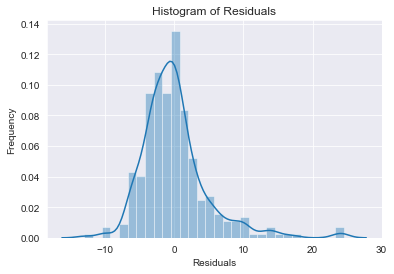

In [16]:
#checking the normality of errors
residuals = y_train-y_pred
sns.distplot(residuals)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

It can be seen from the plot above that the errors follow what closely resembles a normal distribution. Hence the condition of linearity assumption is satisfied!
We will now see how the model performs on the test dataset in the following code sections


In [17]:
#MODEL PREDICTION

#Predicting Test data with the model
y_pred_test = lm.predict(X_test)

In [18]:
# Model Evaluation
print('R^2:', metrics.r2_score(y_test, y_pred_test))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE:',metrics.mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))
lm_score = metrics.r2_score(y_test, y_pred_test)

R^2: 0.7836295385076268
Adjusted R^2: 0.7632468138742874
MAE: 3.3446655035987582
MSE: 19.831323672063345
RMSE: 4.453237437198172


It can be seen since the metrics closely resemble those of the training set, we can say that there is no overfitting involved


#### 2. Random Forest regressor

In [19]:
#MODEL TRAINING

#creating a random forest regressor
rf = RandomForestRegressor()
#training the model
rf.fit(X_train, y_train)

C:\Users\aashi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [20]:
#MODEL EVALUATION 

#making predictions on training data
y_pred = rf.predict(X_train)

In [21]:
#scoring
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.969626416093473
Adjusted R^2: 0.9684650731793999
MAE: 0.9887005649717513
MSE: 2.466002824858757
RMSE: 1.570351178831906


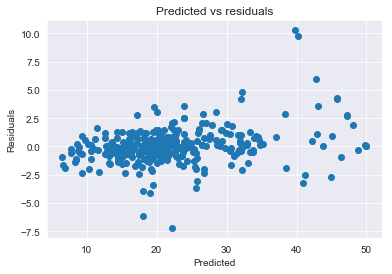

In [22]:
#checking the normality of errors
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [23]:
#MODEL PREDICTION

#Predicting Test data with the model
y_test_pred = rf.predict(X_test)

In [24]:
#scoring
print('R^2:', metrics.r2_score(y_test, y_test_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
rf_acc = metrics.r2_score(y_test, y_test_pred)

R^2: 0.8689952515583942
Adjusted R^2: 0.8566542245312864
MAE: 2.38703947368421
MSE: 12.007173026315789
RMSE: 3.4651367976337943


#### 3. XGBoost Regressor

In [25]:
#MODEL TRAINING

#creating an XGBoost Regressor
xgb = XGBRegressor()
#training the model
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [26]:
#MODEL EVALUATION

#Making prediction on train data
y_pred = xgb.predict(X_train)

In [27]:
#scoring
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9999984799327207
Adjusted R^2: 0.9999984218125012
MAE: 0.007940406314397234
MSE: 0.00012341283848191933
RMSE: 0.011109133111180157


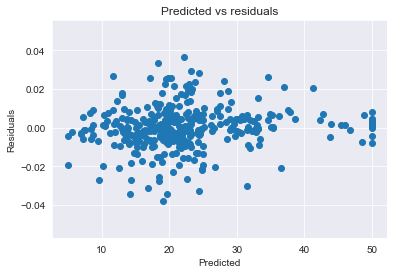

In [28]:
#checking the normality of errors
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [29]:
#MODEL PREDICTION

#Predicting Test data with the model
y_test_pred = xgb.predict(X_test)

In [30]:
#scoring
print('R^2:', metrics.r2_score(y_test, y_test_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
xgb_acc = metrics.r2_score(y_test, y_test_pred)

R^2: 0.8933774560480199
Adjusted R^2: 0.8833333033568913
MAE: 2.368874234274814
MSE: 9.772434579407928
RMSE: 3.1260893428384176


#### 4. SVM Regressor

* Most of the times, the dataset will contain features highly varying in magnitudes, units and range. And since, for the machine learning algorithms that use Eucledian distance between two data points in their computations, this is a problem.
* we will use Standardization technique to perform feature scaling to obtain the scaled variables using the code below to obtain better accuracy
* In general, algorithms that are based on Eucliden distances are senesitive to scaling

In [31]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
#MODEL TRAINING

#creating a SVM regressor
svm = svm.SVR()
#training the model
svm.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
#MODEL EVALUATION 

#making predictions on training data
y_pred = svm.predict(X_train)

In [34]:
#scoring
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.6335038403460446
Adjusted R^2: 0.6194907518886874
MAE: 2.9824629845915793
MSE: 29.75547988633396
RMSE: 5.454858374544106


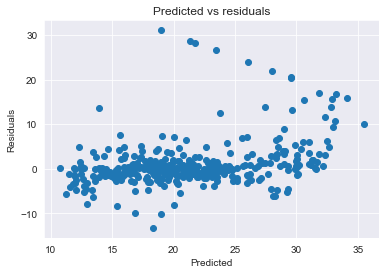

In [35]:
#checking the normality of errors
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [36]:
#MODEL PREDICTION

#Predicting Test data with the model
y_test_pred = svm.predict(X_test)

In [37]:
#scoring
print('R^2:', metrics.r2_score(y_test, y_test_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
svm_acc = metrics.r2_score(y_test, y_test_pred)

R^2: 0.6638733322326673
Adjusted R^2: 0.6322092258487881
MAE: 3.3973459659393512
MSE: 30.807517335452197
RMSE: 5.5504519937976395


## - Model Comparison/Interpreting the results

Having built the various machine learning models, it is now time to see how the stack up against each other 

In [38]:
print('Linear Regression Accuracy: ' ,lm_score*100)
print('Random Forest Regressor Accuracy: ' ,rf_acc*100)
print('XGBoost Regressor Accuracy: ' ,xgb_acc*100)
print('Support Vector Machine Accuracy: ' ,svm_acc*100)

Linear Regression Accuracy:  78.36295385076268
Random Forest Regressor Accuracy:  86.89952515583941
XGBoost Regressor Accuracy:  89.337745604802
Support Vector Machine Accuracy:  66.38733322326674


It can be seen that Random Forest and XGboost Regressors yield the highest accuracy

# The End